<a href="https://colab.research.google.com/github/Amirhosein-javadi/Medical-Imaging/blob/main/Surfing_in_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing

In [ ]:
import os
import numpy as np
import cv2
import nibabel as nib
import matplotlib.pyplot as plt
import glob

# Loading Data

In [ ]:
# Finding the filenames of data for Batch1 and Batch2

Batch_1_segmentation = glob.glob('/content/drive/MyDrive/MedicalImage-Team/LiTS17/LITS Challenge/Training Batch 1/segmentation*.nii')
Batch_1_volume = glob.glob('/content/drive/MyDrive/MedicalImage-Team/LiTS17/LITS Challenge/Training Batch 1/volume*.nii')
Batch_2_segmentation = glob.glob('/content/drive/MyDrive/MedicalImage-Team/LiTS17/LITS Challenge/Training Batch 2/segmentation*.nii')
Batch_2_volume = glob.glob('/content/drive/MyDrive/MedicalImage-Team/LiTS17/LITS Challenge/Training Batch 2/volume*.nii')

In [ ]:
Batch_1_segmentation.sort()
Batch_1_volume.sort()
Batch_2_segmentation.sort()
Batch_2_volume.sort()

In [ ]:
n1 = len(Batch_1_segmentation)
n2 = len(Batch_2_segmentation)
print(f'Number of ". nill" files in Batch 1 is {n1}')
print(f'Number of ". nill" files in Batch 2 is {n2}')
print('volume data is train data and segmentation data is train labels')

Number of ". nill" files in Batch 1 is 28
Number of ". nill" files in Batch 2 is 103
volume data is train data and segmentation data is train labels


# Finding Cancerless Images 

In [ ]:
num_black_1 = []
for i in range(n1):
  counter = 0
  filename = f'/content/drive/MyDrive/MedicalImage-Team/LiTS17/LITS Challenge/Training Batch 1/segmentation-{i}.nii'
  data = nib.load(filename).get_fdata()
  w,h,c = data.shape
  for j in range(c):
    counter = counter + (data[:,:,j] == np.zeros((512,512))).all()
  num_black_1.append(counter/c)

plt.plot(num_black_1, label = "batch 1")
plt.xlabel('x - axis')
plt.ylabel('y - axis')
plt.title('Ratio of black label in each data in batch 1')
plt.show()

KeyboardInterrupt: ignored

In [ ]:
num_black_2 = []
for i in range(n2):
  counter = 0
  filename = f'/content/drive/MyDrive/MedicalImage-Team/LiTS17/LITS Challenge/Training Batch 2/segmentation-{i+n1}.nii'
  data = nib.load(filename).get_fdata()
  w,h,c = data.shape
  for j in range(c):
    counter = counter + (data[:,:,j] == np.zeros((512,512))).all()
  num_black_2.append(counter/c)

plt.plot(num_black_2, label = "batch 2")
plt.xlabel('x - axis')
plt.ylabel('y - axis')
plt.title('Ratio of black label in each data in batch 2')
plt.show()

KeyboardInterrupt: ignored

In [ ]:
data = nib.load(Batch_2_volume[10]).get_fdata()
label = nib.load(Batch_2_segmentation[10]).get_fdata()

plt.subplot(2, 4, 1)
plt.imshow(data[:,:, 83])
plt.subplot(2, 4, 1 + 4)
plt.imshow(label[:,:, 83])

data = nib.load(Batch_2_volume[12]).get_fdata()
label = nib.load(Batch_2_segmentation[12]).get_fdata()

plt.subplot(2, 4, 2)
plt.imshow(data[:,:, 69])
plt.subplot(2, 4, 2 + 4)
plt.imshow(label[:,:, 69])

data = nib.load(Batch_2_volume[25]).get_fdata()
label = nib.load(Batch_2_segmentation[25]).get_fdata()

plt.subplot(2, 4, 3)
plt.imshow(data[:,:, 62])
plt.subplot(2, 4, 3 + 4)
plt.imshow(label[:,:, 62])

data = nib.load(Batch_2_volume[30]).get_fdata()
label = nib.load(Batch_2_segmentation[30]).get_fdata()

plt.subplot(2, 4, 4)
plt.imshow(data[:,:, 191])
plt.subplot(2, 4, 4 + 4)
plt.imshow(label[:,:, 191])

plt.gcf().set_size_inches(15, 15)
plt.show()

In [ ]:
def find_cancer_layer(data):
  l = []
  w,h,c = data.shape
  for i in range(c):
    if (data[:,:,i] == np.zeros((512,512))).all():
      continue
    else:
      l.append(i)
  return l

In [ ]:
cancer_layer_counter = np.zeros(n1+n2)

In [ ]:
f = open("Info.txt","w")
f.write('{:^15s}  '.format("Data number")) 
f.write('{:^15s}'.format("Data shape")) 
f.write('{:^15s}\n'.format("Number of Cancer layers")) 
f.write('{:^45s}\n'.format("Cancer layers")) 

46

In [ ]:
for i in range(n1):
  filename = f'/content/drive/MyDrive/MedicalImage-Team/LiTS17/LITS Challenge/Training Batch 1/segmentation-{i}.nii'
  f.write('{:^15s} '.format(str(i))) 
  data = nib.load(filename).get_fdata()
  data_shape = str(data.shape)
  f.write('{:^15s}'.format(data_shape)) 
  l = find_cancer_layer(data)
  f.write('{:^15s} '.format(str(len(l)))) 
  f.write('{:^45s} \n'.format(str(l))) 
  cancer_layer_counter[i] = len(l)


In [ ]:
for i in range(n2):
  filename = f'/content/drive/MyDrive/MedicalImage-Team/LiTS17/LITS Challenge/Training Batch 2/segmentation-{i+n1}.nii'
  f.write('{:^15s} '.format(str(i+n1))) 
  data = nib.load(filename).get_fdata()
  data_shape = str(data.shape)
  f.write('{:^15s}'.format(data_shape)) 
  l = find_cancer_layer(data)
  f.write('{:^15s} '.format(str(len(l)))) 
  f.write('{:^45s} \n'.format(str(l))) 
  cancer_layer_counter[i+n1] = len(l)

In [ ]:
f.close()

In [ ]:
!cp '/content/Info.txt' '/content/drive/MyDrive/MedicalImage-Team/LiTS17/'

# Finding good layer

In [ ]:
f = open("Info.txt","r")

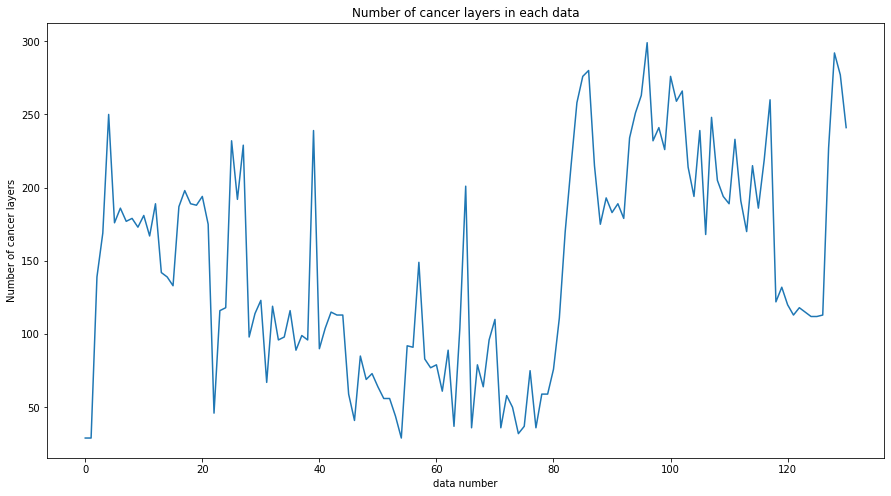

In [ ]:
plt.plot(cancer_layer_counter)
plt.gcf().set_size_inches(15,8)
plt.xlabel('data number')
plt.ylabel('Number of cancer layers')
plt.title('Number of cancer layers in each data')
plt.show()

In [ ]:
max_val = int(np.max(cancer_layer_counter))
min_val = int(np.min(cancer_layer_counter))

cumulative_cancer_layer = np.zeros(max_val-min_val+1)
for i in range(min_val,max_val+1):
    cumulative_cancer_layer[i-min_val] = np.sum(cancer_layer_counter >= i)

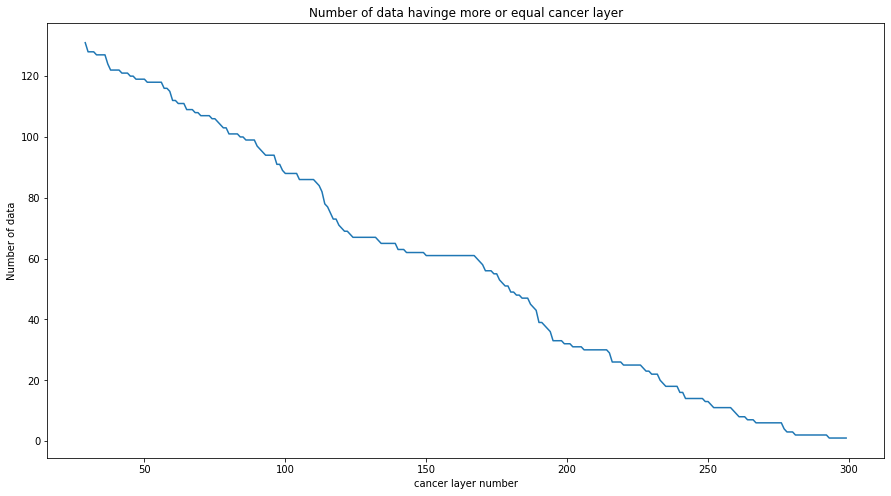

In [ ]:
plt.plot(np.arange(min_val,max_val+1),cumulative_cancer_layer)
plt.gcf().set_size_inches(15,8)
plt.xlabel('cancer layer number')
plt.ylabel('Number of data')
plt.title('Number of data havinge more or equal cancer layer')
plt.show()

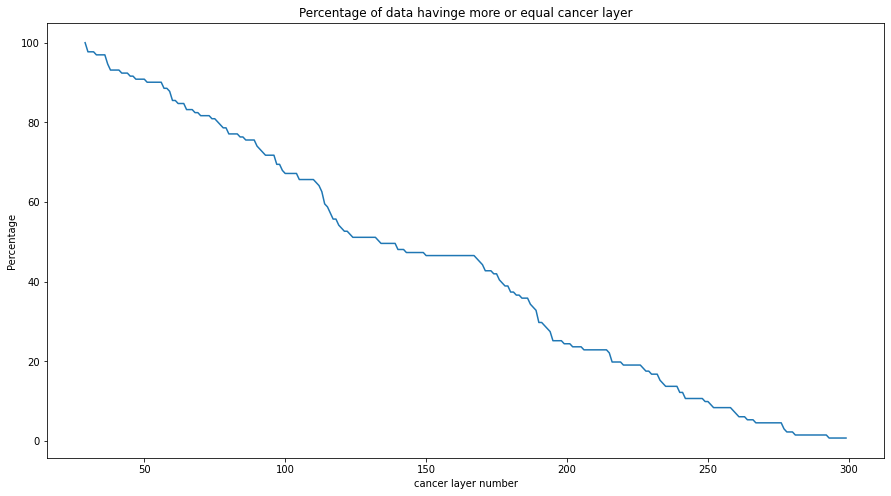

In [ ]:
plt.plot(np.arange(min_val,max_val+1),cumulative_cancer_layer*100/np.max(cumulative_cancer_layer))
plt.gcf().set_size_inches(15,8)
plt.xlabel('cancer layer number')
plt.ylabel('Percentage')
plt.title('Percentage of data havinge more or equal cancer layer')
plt.show()